In [40]:
from __future__ import absolute_import, division
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
import pandas as pd
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from scipy import signal




In [41]:
# names = ["cjc", "qst", "smj"]
# PATH = 'output_old/'
# PATH = '/home/cjc/Documents/2019Summer/Texadar/data/userStudy0903/'
PATH = '/home/cjc/Documents/2019Summer/Texadar/data/output_userStudy0903processed2/'
# PATH = '/home/cjc/Documents/2019Summer/Texadar/data/output_userStudy0903processed_without_rect_slowswipe/'
names = ['cjc','gbs','lhy','ljh','lyz','zsy','zzy','sb','wdy','zdy']
gesture=['button','check','circle','double_tap','fast_swipe','finger_rub',
         'finger_slide','hold','slow_swipe','pull','push','rect','round',
         'single_tap']
x=[]
y=[]
X=[]

flag = 0
data_size = 4200
data_len = 2400
for i in range(4200):
    x.append([])
##-------extract--------
maxlen=0
for name_idx in range(10):#len(names)
    print(names[name_idx])
    for gest_idx in range(len(gesture)):
        for i in range(1,31):
            curr_file = PATH + names[name_idx] + '_' + gesture[gest_idx] + '_'+str(i) +'_filtered.txt'
            data = []
            with open(curr_file,'r') as file:
                data = np.loadtxt(file,delimiter=',')
           
            data = data.reshape(1,-1)[0]
#             print(data.shape)
#             data = data[152:]
#             b, a = signal.butter(8, 0.20, 'lowpass')#0.2 -> 100Hz
#             sig = signal.filtfilt(b, a, data)#data为要过滤的信号
#             b, a = signal.butter(8, 0.20, 'highpass')
#             noise = signal.filtfilt(b, a, data)
    
            x[name_idx*420+gest_idx*30+i-1]=data

cjc
gbs
lhy
ljh
lyz
zsy
zzy
sb
wdy
zdy


In [42]:
y = []
for i in range(10):
    for j in range(14):
        for z in range(30):
            y.append(j)
print(len(y))
t = []
for j in range(data_len):
    t.append(j)
print(len(t))

4200
2400


In [43]:
for i in range(4200):
    if(len(x[i])!=2400):
        print(i,len(x[i]))

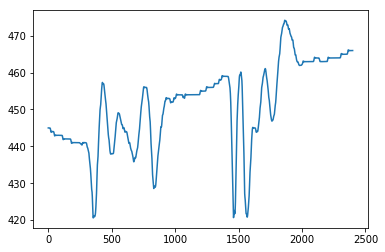

In [38]:
plt.plot(x[200-2])

In [44]:
for i in range(data_size):
    temp = np.array(x[i]).reshape(-1,1)
    tempt = np.array(t).reshape(-1,1)
#     print(temp.shape,tempt.shape)
    res = np.append(tempt,temp,axis=1)
#     print(res.shape)
    tempdf = pd.DataFrame(data=res,
                index=[j for j in range(len(t)*i,len(t)*i+len(t))],
                columns=['time','v'])
    tempdf.insert(0, 'id',[i]*len(t))
#     print(tempdf)
    if(i==0):
        X = tempdf
    else:
        X = X.append(tempdf)

In [45]:
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
from tsfresh.feature_extraction.settings import TimeBasedFCParameters
extracted_features = extract_features(X, column_id='id', column_sort='time', default_fc_parameters=EfficientFCParameters())

Feature Extraction: 100%|██████████| 15/15 [40:56<00:00, 112.06s/it] 


In [33]:
extracted_features

""


In [32]:
X

,id,time,v
0,0,0.0,447.84
1,0,1.0,448.05
2,0,2.0,448.18
3,0,3.0,448.21
4,0,4.0,448.16
5,0,5.0,448.07
6,0,6.0,447.99
7,0,7.0,447.93
8,0,8.0,447.90
9,0,9.0,447.87


In [46]:
extracted_features.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/final2400.csv")

In [47]:
y =  np.array(y)

In [48]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [49]:
features_filtered.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/final_filtered2400.csv")

In [ ]:
print(features_filtered.shape)

In [ ]:
features_filtered.head()

In [ ]:
list(features_filtered.columns)

In [16]:
extracted_features

""
